# Learning to Control Indoor Air Temperature in Buildings With Primal-Dual DDPG and Differentiable Predictive Control

This notebook demonstrates and compares two advanced methods for controlling indoor air temperature in a single-zone building:
- **Primal-Dual Deep Deterministic Policy Gradient (PD-DDPG)**: A reinforcement learning method tailored for constrained optimization in dynamic environments.
- **Differentiable Predictive Control (DPC)**: A model-based offline policy optimization approach leveraging differentiable system dynamics.
---
## Motivation
Buildings today contribute to roughly 40% of the global energy use (approx. 64 PWh), of which a large portion is used for [heating, cooling, ventilation, and air-conditioning (HVAC)](https://en.wikipedia.org/wiki/Heating,_ventilation,_and_air_conditioning) [4]. It has been demonstrated that advanced building control, like [model predictive control (MPC)](https://en.wikipedia.org/wiki/Model_predictive_control)
or [deep reinforcement learning (DRL)](https://en.wikipedia.org/wiki/Deep_reinforcement_learning), can notably reduce the energy use and mitigate greenhouse gas emissions. However, despite intensive research efforts, the practical applications are still in the early stages. One of these challenges is the complexity of the optimal control technology to be deployed in the current predominantly rule-based [building automation systems](https://en.wikipedia.org/wiki/Building_automation).

  
Below is a simplified representation of a building control scheme governed by advanced optimization algorithms:
<img src="./figs/building_control.PNG" width="500">

---
## Objectives
1. Train a PD-DDPG agent for building temperature regulation task.
2. Implement DPC for the same problem and compare:
   - Energy consumption.
   - Temperature constraint violations.
   - Training time.
3. Provide insights into the strengths and weaknesses of both methods.
---
## Differentiable Predictive Control (DPC)

[Differentiable Predictive Control](https://www.sciencedirect.com/science/article/pii/S0959152422000981) (DPC) is a model-based offline optimization algorithm that leverages differentiable system models to train constrained control policies. 

**Key Features of DPC**:
- **Differentiable system model**:  
The DPC is a model-based policy optimization algorithm, that exploits the differentiability of a wide class of model representations for dynamical systems, including differential equations, state-space models, or various neural network architectures. In this example, we compactly represent the system model by ODE equations  $\text{ODESolve}(f(x^i_k, u^i_k))$  describing the governing dynamics of the controlled system. 
- **Constrained Neural Policy**: Learns a control policy $u_k = \pi(x_k, R, d)$ that minimizes energy use while ensuring temperature constraints are satisfied. The policy uses:
  - $x_k$: System states (e.g., indoor temperature).
  - $R$: Reference trajectory (temperature bounds over the prediction horizon).
  - $d_k$: Disturbances (e.g. Solar radiation)
- **Optimization Problem**: Solves a parametric optimization problem to minimize the tracking error and energy use:
  $$
\begin{align}
&\underset{\theta}{\text{minimize}}     && \sum_{i=1}^m  \Big( \sum_{k=1}^{N-1} Q_x||x^i_k - r^i_k||_2^2  + Q_N||u^i_k||_2^2 \Big) \\
&\text{subject to}    && x^i_{k+1} =  \text{ODESolve}(f(x^i_k, u^i_k)) \\
&                     && u^i_k = \pi_{\theta}(x^i_k, R^i, d^i_k) \\
&                     && 0 \le x^i_k \le 1 \\
&                     && 0 \le u^i_k \le 1 \\
&                     && x^i_0 \sim \mathcal{P}_{x_0} \\
&                     && R^i \sim  \mathcal{P}_R
\end{align}
$$  

DPC combines the advantages of model-based optimization with neural network policy flexibility, making it a powerful tool for control tasks like building temperature regulation.
- **Schematics of the Differentiable Predictive Control method [[1]](https://www.sciencedirect.com/science/article/pii/S0959152422000981)**:  

<p align="center">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0959152422000981-gr4_lrg.jpg" width="500">  
</p>

---


## Primal-Dual Deep Deterministic Policy Gradient (PD-DDPG)

[PD-DDPG](https://arxiv.org/abs/1802.06480) is a reinforcement learning algorithm designed to handle **Constrained Markov Decision Processes (CMDPs)**. It extends the [Deep Deterministic Policy Gradient (DDPG)](https://arxiv.org/abs/1509.02971) method by incorporating a primal-dual optimization framework to address constraints.
PD-DDPG excels in scenarios with hard constraints, such as maintaining temperature within predefined comfort bounds while minimizing energy use. We will explain the mathematical details further during the coding sections of this algorithm.



---
## Expected Outcomes
- A fair comparison of PD-DDPG and DPC for building control tasks.
- Recommendations for future improvements in these methods.
- Insights into the trade-offs between RL and model-based control approaches.
---
## References
### DPC References
[1] [Ján Drgoňa, Karol Kiš, Aaron Tuor, Draguna Vrabie, Martin Klaučo,
Differentiable predictive control: Deep learning alternative to explicit model predictive control for unknown nonlinear systems,
Journal of Process Control, Volume 116, 2022](https://www.sciencedirect.com/science/article/pii/S0959152422000981)  
[2] [Jan Drgona, Aaron Tuor, Draguna Vrabie, Learning Constrained Adaptive Differentiable Predictive Control Policies With Guarantees, 2020, arXiv:2004.11184](https://arxiv.org/abs/2004.11184)  
[3] [Ján Drgoňa, Aaron Tuor, Elliott Skomski, Soumya Vasisht, Draguna Vrabie,
Deep Learning Explicit Differentiable Predictive Control Laws for Buildings,
IFAC-PapersOnLine,
Volume 54, Issue 6,
2021](https://www.sciencedirect.com/science/article/pii/S2405896321012933)

### Related Building Control References
[4] [Ján Drgoňa, Javier Arroyo, Iago Cupeiro Figueroa, David Blum, Krzysztof Arendt, Donghun Kim, Enric Perarnau Ollé, Juraj Oravec, Michael Wetter, Draguna L. Vrabie, Lieve Helsen,
All you need to know about model predictive control for buildings,
Annual Reviews in Control,
Volume 50,
2020](https://www.sciencedirect.com/science/article/pii/S1367578820300584)  
[5] [Ján Drgoňa, Damien Picard, Lieve Helsen,
Cloud-based implementation of white-box model predictive control for a GEOTABS office building: A field test demonstration,
Journal of Process Control,
Volume 88,
2020](https://www.sciencedirect.com/science/article/pii/S0959152419306857)  
[6] [Zoltan Nagy, Gregor Henze, Sourav Dey, Javier Arroyo, Lieve Helsen, Xiangyu Zhang, Bingqing Chen, Kadir Amasyali, Kuldeep Kurte, Ahmed Zamzam, Helia Zandi, Ján Drgoňa, Matias Quintana, Steven McCullogh, June Young Park, Han Li, Tianzhen Hong, Silvio Brandi, Giuseppe Pinto, Alfonso Capozzoli, Draguna Vrabie, Mario Bergés, Kingsley Nweye, Thibault Marzullo, Andrey Bernstein,
Ten questions concerning reinforcement learning for building energy management,
Building and Environment,
Volume 241,
2023](https://www.sciencedirect.com/science/article/abs/pii/S0360132323004626)  
[7] [Bingqing Chen, Priya L. Donti, Kyri Baker, J. Zico Kolter, and Mario Bergés. 2021. Enforcing Policy Feasibility Constraints through Differentiable Projection for Energy Optimization. In Proceedings of the Twelfth ACM International Conference on Future Energy Systems (e-Energy '21)](https://dl.acm.org/doi/abs/10.1145/3447555.3464874)  
[8] [Jan Široký, Frauke Oldewurtel, Jiří Cigler, Samuel Prívara,
Experimental analysis of model predictive control for an energy efficient building heating system,
Applied Energy,
Volume 88, Issue 9,
2011](https://www.sciencedirect.com/science/article/pii/S0306261911001668)


### Related Deep Reinforcement Learning References
[9] [Liang Q, Que F, Modiano E. Accelerated primal-dual policy optimization for safe reinforcement learning. arXiv preprint arXiv:1802.06480. 2018 Feb 19.](https://arxiv.org/abs/1802.06480)  
[10] [Lillicrap TP. Continuous control with deep reinforcement learning. arXiv preprint arXiv:1509.02971. 2015.](https://arxiv.org/abs/1509.02971)


## For Colab only:

In [ ]:
!pip install neuromancer gym

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
from collections import deque
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## Generating Training Data for RL and DPC Controllers

The `generate_data()` function simulates the dynamics of a single-zone building, enabling the creation of structured datasets for reinforcement learning (RL) agents and Dynamic Programming Controllers (DPC). The function relies on a **linear state-space model** to approximate the behavior of the building:

$$
x_{t+1} = A \, x_t + B \, u_t + E \, d_t, \quad y_t = C \, x_t,
$$

where:
- **`x_t`**: State vector (e.g., indoor temperature).
- **`u_t`**: Control action (bounded by `umin` and `umax`).
- **`d_t`**: External disturbances (e.g., outdoor temperature, solar radiation).
- **`A`, `B`, `C`, `E`**: System matrices describing the dynamics.

---

### Steps in `generate_data()`

1. **System Initialization**: The `LinearSimpleSingleZone` model is loaded from Neuromancer to extract matrices (`A`, `B`, `C`, `E`) and control bounds (`umin`, `umax`).
2. **Helper Function (`create_dataset`)**:
   - Generates references (`ymin`, `ymax`) for target temperature ranges.
   - Samples disturbance trajectories (`d`) and initial conditions (`x0`).
   - Returns a structured `DictDataset` for training or validation.
3. **Dataset Creation**:
   - `train_data`: Dataset for training, using `ref_range` as the reference offset.
   - `dev_data`: Dataset for validation, using the same reference offset.
4. **Data Loaders**:
   - Converts `train_data` and `dev_data` into PyTorch data loaders for batch processing.
5. **Normalization Statistics**:
   - Computes mean and standard deviation for features (`x`, `ymin`, `ymax`, `d`) to normalize the data during training.

---

### Outputs

1. **`problem_specs`**: Contains system properties like state dimensions, control bounds, and system matrices.
2. **`data_stats`**: Mean and standard deviation for normalization.
3. **`data`**: Includes structured `train_data` and `dev_data` datasets.
4. **`data_loader`**: PyTorch data loaders for efficient batch access.

---

### Example

```python
problem_specs, data_stats, data, data_loader = generate_data(
    nsteps=50, n_samples=100, x_min=18.0, x_max=24.0, ref_range=2.0, batch_size=32
)
```

In [2]:
import neuromancer.psl as psl
from neuromancer.dataset import DictDataset
import torch

def generate_data(nsteps, n_samples, x_min, x_max, ref_range, batch_size):
    sys = psl.systems['LinearSimpleSingleZone']()
    
    # Extract system dynamics and dimensions
    A, B, C, E = map(torch.tensor, (sys.params[2]['A'], sys.params[2]['Beta'], sys.params[2]['C'], sys.params[2]['E']))
    umin, umax = torch.tensor(sys.umin), torch.tensor(sys.umax)
    nx, nu, nd, ny, nref = sys.nx, sys.nu, E.shape[1], sys.ny, sys.ny
    
    problem_specs = {
        "nx": nx, "nu": nu, "nd": nd, "ny": ny, "nref": nref,
        "umin": umin, "umax": umax, "A": A, "B": B, "C": C, "E": E
    }

    # Helper function to generate dataset
    def create_dataset(ref_offset, num_samples):
        ymin = torch.cat([
            x_min + (x_max - x_min) * torch.rand(1, 1) * torch.ones(nsteps, nref)
            for _ in range(num_samples)
        ]).reshape(num_samples, nsteps, nref)
        ymax = ymin + ref_offset
        dist = torch.stack([torch.tensor(sys.get_D(nsteps)) for _ in range(num_samples)], dim=0)
        x0 = torch.stack([torch.tensor(sys.get_x0().reshape(1, nx)) for _ in range(num_samples)], dim=0)
        return DictDataset({'x': x0, 'ymin': ymin, 'ymax': ymax, 'd': dist})
    
    # Generate training and development datasets
    train_data = create_dataset(ref_range, n_samples)
    dev_data = create_dataset(ref_range, n_samples // 10)
    
    # Data loaders
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                               collate_fn=train_data.collate_fn, shuffle=False)
    dev_loader = torch.utils.data.DataLoader(dev_data, batch_size=batch_size,
                                             collate_fn=dev_data.collate_fn, shuffle=False)
    
    # Normalization statistics
    all_data = train_data.datadict  # Access the internal data dictionary directly
    means = {k: v.mean(dim=[0, 1]) for k, v in all_data.items()}
    stds = {k: v.std(dim=[0, 1]) for k, v in all_data.items()}
    
    data_stats = {"means": torch.cat(list(means.values())), "stds": torch.cat(list(stds.values()))}
    data = {"train_data": train_data, "dev_data": dev_data}
    data_loader = {"train_loader": train_loader, "dev_loader": dev_loader}
    
    return problem_specs, data_stats, data, data_loader


## SimpleBuildingEnv: A Custom Gym Environment for Indoor Temperature Control

`SimpleBuildingEnv` is a custom reinforcement learning (RL) environment built on [OpenAI Gym](https://www.gymlibrary.dev/index.html) to regulate indoor temperature efficiently. RL works by training an agent to interact with an environment, learn through trial and error, and optimize its actions to maximize rewards over time. Each RL problem is unique, so we define custom environments like this one to capture specific dynamics and constraints.

---


### RL Terminology:
- **Agent**: The decision-maker that takes actions in the environment.
- **Environment**: The system the agent interacts with, defined by states, actions, and rewards.
- **State**: The current representation of the system (e.g., indoor temperature, disturbances in our case).
- **Action**: A decision made by the agent (e.g., adjusting HVAC controls).
- **Reward**: Feedback given to the agent for its actions on how well its performing (e.g., penalizing energy usage).
- **Cost (in Safe RL)**: Feedback that measures how much the agent's actions violate safety constraints. Unlike rewards, which the agent seeks to maximize, costs are minimized to ensure the agent's behavior adheres to safety or operational limits (e.g., maintaining temperature within comfortable bounds).
- **Policy**: The agent’s strategy for selecting actions based on the current state.

This environment uses a linear state-space model for building dynamics and leverages the `generate_data()` function to create realistic training datasets for RL agents and controllers.



### How RL Works

The agent interacts with the environment in a loop:

1. **Observation**: The agent observes the current state of the environment (e.g., indoor temperature and external disturbances).
2. **Action Selection**: Based on the current state, the agent selects an action (e.g., adjusting HVAC power).
3. **Transition**: The environment transitions to a new state based on the action and its internal dynamics.
4. **Getting Reward**: The agent receives feedback on its action's effectiveness (e.g., minimizing energy usage while maintaining comfort).
5. **Policy Update**: The agent evaluates and improves its decision-making policy using collected rewards.

This process is illustrated in the diagram below:


<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*G-_27UjSJpZ7nY19w7OOCg.png" width="500">
</p>



---

> **Note:** <span>In this tutorial, we use a custom decorator to split class definitions across cells, making the code modular and allowing markdown explanations between methods for clarity. To add methods to a class, apply the custom decorator right before the method definition:</span>

```python
@add_to_class(ClassName)
def method_name(self):
    # Method implementation
    pass
```


In [3]:
def add_to_class(cls):
    def decorator(func):
        setattr(cls, func.__name__, func)
        return func
    return decorator

## Initialization of SimpleBuildingEnv

1. **Inputs**:
   - **`problem_specs`**: Defines system-specific properties such as state-space matrices, control input bounds, and dimensions.
   - **`train_data`**: Provides sampled data for initial states, disturbances, and reference temperature bounds.
   - **`data_stats`**: Contains mean and standard deviation values for normalizing the state observations.

2. **Action Space**:
   - A single scalar action (e.g., heating or cooling intensity) is defined within the range `[0, 1]`, scaled appropriately using `problem_specs['umax']`.

3. **Observation Space**:
   - The observation includes the state of the system (`nx`), disturbances (`nd`), and reference temperature bounds (`nref`).
   - It is represented as a continuous space with infinite bounds to accommodate varying inputs.




In [4]:
import gym
from gym import spaces

In [5]:
class SimpleBuildingEnv(gym.Env):
    """Custom Environment for controlling the building indoor temperature using reinforcement learning."""

    def __init__(self, problem_specs, train_data, data_stats):
        super().__init__()
        
        #Get the problem data and data statistics
        self.state_means, self.state_stds = data_stats["means"], data_stats["stds"]
        self.train_data = train_data
        self.problem_specs = problem_specs
        self.t = 0      #Initialize the timestep
        self.idx = 0    #Initialize the batch index in training data

        # Define action space: a single scalar action in [0, 1]
        self.action_space = spaces.Box(
            low=np.array([0.]),
            high=np.array([1.]),
            dtype=np.float32,
            shape=(self.problem_specs['nu'],)
        )

        # Define observation space
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            dtype=np.float32,
            shape=(
                self.problem_specs['nx'] + self.problem_specs['nd'] + self.problem_specs['nref'] * 2,
            )
        )


#### Method: `reset`

These methods provide essential functionality for resetting the environment and calculating feedback for the RL agent.

The `reset` method initializes the environment at the start of an episode:
1. **Initialization**: Selects the sample from `train_data` based on the current index for the initial state, disturbances, and reference bounds.
2. **Reset Variables**: Resets the timestep (`t`) and previous action.
3. **Build State**: Constructs the normalized initial observation by calling the method `build_state()`.
4. **Return**: Provides the initial observation.


In [6]:
@add_to_class(SimpleBuildingEnv)
def reset(self):
    self.done = False
    self.x = self.train_data[self.idx]['x']
    self.y = self.x @ self.problem_specs['C'].T
    self.d = self.train_data[self.idx]['d']
    self.ymin = self.train_data[0]['ymin'][0]
    self.ymax = self.train_data[0]['ymax'][0]
    self.t = 0
    obs = self.build_state()
    return obs

#### Method: `build_state`

The `build_state` method constructs the current state of the environment for the RL agent by combining various components of the system and normalizing them. This method ensures the agent receives a well-structured and scaled observation for training.

#### Steps:
1. **Combine Observations**:
   - The method concatenates the following:
     - Current system state (`self.x`)
     - Reference temperature bounds (`self.ymin` and `self.ymax`)
     - Current disturbance values (`self.d[self.t]`).

2. **Normalize the State**:
   - The combined observation is normalized using the mean and standard deviation values (`self.state_means`, `self.state_stds`) provided during initialization.

To add this method to the `SimpleBuildingEnv` class, we use the decorator `add_to_class(ClassName)` 


In [7]:
@add_to_class(SimpleBuildingEnv)
def build_state(self):
    combined_obs = torch.concat((self.x.squeeze(dim=0), self.ymin, self.ymax, self.d[self.t]))
    # # Normalize the state
    normalized_obs = (combined_obs - self.state_means) / self.state_stds
    
    return normalized_obs

#### Methods `get_reward`, `get_cost`:
The `get_reward` method computes the reward for the agent's action which is the energy consumption,  and the `get_cost` method penalizes deviations from the reference bounds (ymin, ymax).


In [8]:
@add_to_class(SimpleBuildingEnv)
def get_reward(self, action):
    """Calculate the reward based on the action."""
    reward = - (action * 0.01) * self.problem_specs['umax'].numpy()
    return reward

@add_to_class(SimpleBuildingEnv)
def get_cost(self, output):
    """Calculate the cost based on the output."""
    cost = (np.maximum(self.ymin - output, 0) + np.maximum(output - self.ymax, 0)) * 50.0
    return cost

#### Method: `step`

The `step` method updates the environment's state based on the agent's action and calculates feedback for learning.

#### Steps:
1. **Scale the Action**: Converts the agent's action to the appropriate scale using `umax`.
2. **Simulate the Next State**: Updates the state (`x`) and output (`y`) using state-space equations.
3. **Calculate Feedback**:
   - **Reward**: Energy consumption (`u`).
   - **Cost**: Penalizes deviations from desired temperature bounds.
4. **Advance Time**: Updates the timestep and handles data resets when the trajectory ends.
5. **Return**: Provides the next state, reward, cost, and a `done` flag indicating whether the episode ends or not.

> **Note:** <span>This part of the code is for checking if the episode ends or not, and transfering to the next batch of training data:</span>

```python
if self.t == len(self.train_data[0]['d']):
        done = True
        self.idx = (self.idx+1)%len(self.train_data)
        self.d = self.train_data[self.idx]['d']
        self.t = 0
```




In [9]:
@add_to_class(SimpleBuildingEnv)
def step(self, action):
    """Take a step in the environment by the given action. Returns the next state, reward, cost. """
    
    # Scale the action
    scaled_action = torch.tensor(action) * self.problem_specs['umax']
    scaled_action = scaled_action.to(torch.float32)

    # Simulate the next state
    self.x = self.x @ self.problem_specs["A"].T + scaled_action @ self.problem_specs["B"].T + self.d[self.t] @ self.problem_specs["E"].T
    self.y = self.x @ self.problem_specs["C"].T

    # Calculate reward and cost
    reward = self.get_reward(action)
    cost = self.get_cost(self.y)
    
    # update the timestep 
    self.t += 1
    
    done = False
    
    if self.t == len(self.train_data[0]['d']):
        done = True
        self.idx = (self.idx+1)%len(self.train_data)
        self.d = self.train_data[self.idx]['d']
        self.t = 0
        
    next_obs = self.build_state()
    
    return next_obs, reward, cost, done


### Example on initializing the environment and run simulation:
```python
#to initialize:
env = SimpleBuildingEnv(problem_specs, data["train_data"], data_stats)
```

In the learning process, the action comes from the policy network, however, `gym` objects have a built-in method for sampling the action space. as an example:
```python
env.reset()   #resets the environment and returns the initial observation of the agent
env.step(env.action_space.sample())   #takes a step forward with a randomly sampled action
``` 

In [10]:
problem_specs, data_stats, data, data_loader = generate_data(
    nsteps=100, n_samples=1000, x_min=18.0, x_max=22.0, ref_range=2.0, batch_size=100
)

In [11]:
train_env = SimpleBuildingEnv(problem_specs, data["train_data"], data_stats)
dev_env = SimpleBuildingEnv(problem_specs, data["dev_data"], data_stats)

/home/alireza/anaconda3/envs/neuromancer/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [12]:
# obs = train_env.reset()
# print(train_env.idx)
# while train_env.idx+1  != len(train_env.train_data):
#     obs, reward, cost, done  = train_env.step(train_env.action_space.sample())
#     if done:
#         print(train_env.idx)
#         obs = train_env.reset()
# 
# 


### Class: `ReplayBuffer`

The `ReplayBuffer` class is essential for reinforcement learning as it allows the agent to store and reuse past experiences, enabling stable and efficient training. By sampling random batches of transitions, it breaks the correlation between consecutive experiences, improving the training of deep RL algorithms.

#### Methods:
1. **`__init__(self, max_size=1e6)`**:
   - Initializes the buffer with a maximum size using a deque.

2. **`add(self, transition)`**:
   - Adds a single transition `(state, next_state, action, reward, cost, done)` to the buffer.

3. **`sample(self, batch_size)`**:
   - Randomly samples a batch of transitions and returns tensors for states, next states, actions, rewards, costs, and done flags.

This replay buffer ensures that the RL agent learns effectively from diverse and decorrelated experiences, which is crucial for generalizing to various scenarios.

> **Note:** 
The concept of experience replay for RL agents was first introduced in this paper:
*Playing Atari with Deep Reinforcement Learning* by Mnih et al., 2013 ([arXiv:1312.5602](https://arxiv.org/abs/1312.5602)).

In [13]:
class ReplayBuffer:
    def __init__(self, max_size=1e6):
        """
        Initialize the replay buffer.

        Args:
            max_size (int): Maximum number of transitions to store in the buffer.
        """
        self.storage = deque(maxlen=int(max_size))

    def add(self, transition):
        """
        Add a transition to the replay buffer.

        Args:
            transition (tuple): A tuple containing (state, next_state, action, reward, cost).
        """
        self.storage.append(transition)

    def sample(self, batch_size):
        """
        Sample a batch of transitions from the replay buffer.

        Args:
            batch_size (int): Number of transitions to sample.

        Returns:
            tuple: Batch of (states, next_states, actions, rewards, costs).
        """
        indices = torch.randint(0, len(self.storage), (batch_size,))
        batch_states, batch_next_states, batch_actions, batch_rewards, batch_costs, batch_dones = [], [], [], [], [], []

        for i in indices:
            state, next_state, action, reward, cost, done= self.storage[i]
            batch_states.append(state)
            batch_next_states.append(next_state)
            batch_actions.append(action)
            batch_rewards.append(reward)
            batch_costs.append(cost)
            batch_dones.append(done)

        return (
            torch.stack(batch_states),
            torch.stack(batch_next_states),
            torch.stack(batch_actions),
            torch.tensor(batch_rewards, dtype=torch.float32).view(-1, 1),
            torch.tensor(batch_costs, dtype=torch.float32).view(-1, 1),
            torch.tensor(batch_dones, dtype=torch.float32).view(-1, 1),

        )


## Primal-Dual Deep Deterministic Policy Gradient (PD-DDPG)

PD-DDPG is a reinforcement learning algorithm tailored for **Constrained Markov Decision Processes (CMDPs)**, where the agent must balance maximizing rewards while satisfying constraints. It builds upon the [Deep Deterministic Policy Gradient (DDPG)](https://arxiv.org/abs/1509.02971) method by introducing a **primal-dual optimization framework** to handle constraints effectively. The algorithm operates in continuous environments, meaning episodes do not have a fixed termination point. A key aspect of this implementation is setting the discount factor ($\gamma$) for the cost network to 0, focusing on immediate constraint satisfaction, while the reward network retains a positive discount factor to encourage long-term optimization.

---

### PD-DDPG Framework

#### **State Transition Dynamics**
The environment is modeled as a Markov Decision Process (MDP) with the dynamics:
$$
s_{t+1} = f(s_t, a_t) + \epsilon_t
$$
where:
- $s_t$: State at time $t$ (e.g., temperature and disturbances),
- $a_t$: Action taken (e.g., HVAC adjustment),
- $f$: State transition function,
- $\epsilon_t$: Noise (in stochastic environments)

The agent learns to transition through states to achieve optimal performance while minimizing constraint violations.

---

#### **Primal-Dual Optimization**
The algorithm optimizes the Lagrangian function:
$$
\mathcal{L}(\pi, \lambda) = \mathbb{E}_{\pi} \left[ r(s_t, a_t) - \lambda \cdot c(s_t, a_t) \right]
$$
where:
- $r(s_t, a_t)$: Reward for energy efficiency or comfort,
- $c(s_t, a_t)$: Cost for constraint violations (e.g., exceeding temperature bounds),
- $\lambda$: Dual variable balancing rewards and costs,
- $\pi(a_t | s_t)$: Policy guiding the agent’s actions.

This dual approach dynamically adjusts the importance of constraint satisfaction versus reward maximization.

---

### Networks in PD-DDPG

#### Actor Network
The **actor network** generates actions based on the current state, aiming to maximize rewards and minimize costs. It outputs continuous actions scaled to the environment's limits (e.g., HVAC adjustments). Smooth action transitions are encouraged by penalizing abrupt changes between consecutive actions.

#### Critic Network
The **critic network** evaluates the chosen actions by estimating the expected cumulative reward:
$$
Q(s_t, a_t) = \mathbb{E} \left[ r(s_t, a_t) + \gamma \cdot Q(s_{t+1}, a_{t+1}) \right]
$$
This helps the actor learn which actions lead to higher rewards over time.

#### Cost Network
The **cost network** directly estimates the immediate cost:
$$
C(s_t, a_t) = c(s_t, a_t)
$$
By setting $\gamma = 0$ for the cost network, the algorithm prioritizes real-time constraint satisfaction.



### Actor Network

The **Actor Network** generates continuous actions for the agent based on the current state. It uses multiple fully connected layers with customizable activation functions and a final output layer (e.g., Sigmoid) to scale actions within a specified range.

#### Creating an Actor Object

To create an instance of the `Actor` class, specify the dimensions and hidden layers:

```python
state_dim = 10  # Example state dimension
action_dim = 2  # Example action dimension
hidden_layers = [64, 64]  # Two hidden layers with 64 neurons each

actor = Actor(state_dim, action_dim, hidden_layers)
```

In [14]:
# Actor Network
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_layers, activation=nn.ReLU, output_activation=nn.Sigmoid):
        super(Actor, self).__init__()
        layers = []
        input_dim = state_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            if activation:
                layers.append(activation())
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, action_dim))
        if output_activation:
            layers.append(output_activation())
        self.model = nn.Sequential(*layers)

    def forward(self, state):
        return self.model(state)


### Critic or Cost Network

The **Critic Network** evaluates the quality of an action in a given state by estimating the Q-value. Similarly, the **Cost Network** shares the same architecture but focuses on estimating the immediate cost associated with an action. Both networks take the concatenated state and action as input, pass them through hidden layers with activation functions, and output a single scalar value (Q-value or C-value).

#### Creating a Critic or Cost Network

To instantiate either a `Critic` or a `Cost` network, specify the state and action dimensions along with the hidden layers:

```python
state_dim = 10  # Example state dimension
action_dim = 2  # Example action dimension
hidden_layers = [128, 128]  # Two hidden layers with 128 neurons each

critic_net = Critic(state_dim, action_dim, hidden_layers)
cost_net = Critic(state_dim, action_dim, hidden_layers)  # Same architecture for the Cost Network
```

In [15]:
class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_layers, activation=nn.ReLU):

        super(Critic, self).__init__()
        layers = []
        input_dim = state_dim + action_dim

        # Create hidden layers with activation functions
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(activation())  # Add activation after each layer
            input_dim = hidden_dim

        # Output layer (no activation here)
        layers.append(nn.Linear(input_dim, 1))
        self.layers = nn.Sequential(*layers)

    def forward(self, state, action):

        x = torch.cat([state, action], dim=-1)  # Concatenate state and action
        return self.layers(x)

### PD-DDPG Agent Initialization

The **PD-DDPG** class sets up the actor, critic, and cost networks along with their target networks. It initializes the dual variable ($\lambda$) and handles hyperparameters like learning rates, constraint limits, and network architectures.


In [16]:
class PD_DDPG:
    def __init__(self, state_dim, action_dim, max_action, lambda_, lambda_step, constraint_limit, lr_critic, lr_actor, hidden_layers):
        """
        Initialize the PD-DDPG agent.

        Args:
            state_dim (int): Dimension of state space.
            action_dim (int): Dimension of state space.
            max_action (float): Maximum action value.
            lambda_ (float): Initial dual variable for the constraint.
            lambda_step (float): Step size for updating lambda.
            constraint_limit (float): Constraint tolerance limit.
            lr_critic (float): Learning rate for the critic.
            lr_actor (float): Learning rate for the actor.
            hidden_layers (list): List of integers specifying the number of neurons in each hidden layer.
        """

        # Actor network and optimizer
        self.actor = Actor(state_dim, action_dim, hidden_layers).to(device)
        self.actor_target = Actor(state_dim, action_dim, hidden_layers).to(device)
        self.actor_target.load_state_dict(self.actor.state_dict())
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=lr_actor)

        # Critic network and optimizer
        self.critic = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.critic_target = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.critic_target.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=lr_critic)

        # Cost network and optimizer
        self.cost = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.cost_target = Critic(state_dim, action_dim, hidden_layers).to(device)
        self.cost_target.load_state_dict(self.cost.state_dict())
        self.cost_optimizer = torch.optim.Adam(self.cost.parameters(), lr=lr_critic)

        # Lambda and constraint
        self.lambda_ = torch.tensor([lambda_], requires_grad=False).to(device)
        self.lambda_step = lambda_step
        self.constraint_limit = constraint_limit

        self.max_action = max_action


### Transition Storage and Action Selection

- **`store_transition`**: Normalizes and stores a state-action transition in the replay buffer for training.
- **`select_action`**: Uses the actor network to compute and return a clipped action for a given state.

> **Note:** <span>To add these methods, we use the decorator `add_to_class(PD-DDPG)`:</span>


In [17]:
@add_to_class(PD_DDPG)
def store_transition(self, replay_buffer, state, next_state, action, reward, cost, done):
    """
    Normalizing the transition and storing it in the replay buffer.

    """
    # Update the normalizer
    state = state.clone().detach().to(torch.float32).to(device)
    next_state = next_state.clone().detach().to(torch.float32).to(device)
    action = torch.tensor(action, dtype=torch.float32).to(device)
    reward = torch.tensor(reward, dtype=torch.float32).to(device)
    cost = cost.clone().detach().to(torch.float32).to(device)
    done = torch.tensor(done, dtype=torch.float32).to(device)


    # Store in the replay buffer
    replay_buffer.add((state, next_state, action, reward, cost, done))

@add_to_class(PD_DDPG)
def select_action(self, state):
    """
    Select an action for a given state.

    Args:
        state (np.ndarray or list): Current state.

    Returns:
        np.ndarray: Action.
    """
    # Ensure the state is a tensor
    if isinstance(state, list):
        state = torch.tensor(state, dtype=torch.float32)
    elif isinstance(state, np.ndarray):
        state = torch.tensor(state, dtype=torch.float32)

    state = state.to(device).unsqueeze(0)  # Add batch dimension
    action = self.actor(state).cpu().data.numpy().reshape(1, 1) * self.max_action
    return np.clip(action, 0, self.max_action)


### Training PD-DDPG

The networks are trained using the following process:

1. **Sampling Transitions**: Transitions $(s_t, a_t, r_t, c_t, s_{t+1})$ are sampled from the replay buffer, representing the agent's experiences in the environment.

2. **Critic Update**: The critic minimizes the error between the estimated and target Q-values:
   $$
   \mathcal{L}_{\text{critic}} = \mathbb{E} \left[ \left( Q(s_t, a_t) - \left( r(s_t, a_t) + \gamma \cdot Q(s_{t+1}, a_{t+1}) \right) \right)^2 \right]
   $$
   Here:
   - **Target Q-value**: Computed using the **critic target network**, which evaluates the next state ($s_{t+1}$) and next action ($a_{t+1}$).
   - **next action ($a_{t+1}$)**: Generated by the **actor target network**, ensuring smoother updates and preventing instability.
   - In the code, the loss is implemented as:
    ```python
    next_action = self.actor_target(next_state)
    target_Q = self.critic_target(next_state, next_action)
    target_Q = reward + ((1 - done) * discount * target_Q).detach()
     
    # Update critic
    current_Q = self.critic(state, action)
    critic_loss = F.mse_loss(current_Q, target_Q)
    self.critic_optimizer.zero_grad()
    critic_loss.backward()
    self.critic_optimizer.step()
    ```

3. **Cost Update**: The cost network minimizes the error in cost estimation:
   $$
   \mathcal{L}_{\text{cost}} = \mathbb{E} \left[ \left( C(s_t, a_t) - c(s_t, a_t) \right)^2 \right]
   $$
   Similar to the critic, the cost network also uses the **target network** architecture to estimate costs.
   - In the code, the loss is implemented as:
    ```python
    target_C = self.cost_target(next_state, next_action)
   #Update cost network
    current_C = self.cost(state, action)
    cost_loss = F.mse_loss(current_C, target_C)
    self.cost_optimizer.zero_grad()
    cost_loss.backward()
    self.cost_optimizer.step()
    ```

4. **Actor Update**: The actor is trained to maximize rewards and minimize costs:
   $$
   \mathcal{L}_{\text{actor}} = -\mathbb{E} \left[ Q(s_t, a_t) - \lambda \cdot C(s_t, a_t) \right]
   $$
   - The actor learns by updating actions based on feedback from the critic (rewards) and cost networks (constraints).
   - Smooth actions are encouraged by penalizing large changes between consecutive actions:
     $$
     \mathcal{L}_{\text{actor}} += \beta \cdot \| a_t - a_{t+1} \|^2
     $$
       - In the code, the loss is implemented as:
            ```python
            actor_loss = -(Q_value - self.lambda_.detach() * C_value).mean() + nn.MSELoss()(self.actor(state), self.actor_target(next_state))
            ```

5. **Dual Variable Update**: The dual variable $\lambda$ is updated dynamically to balance the trade-off between rewards and costs. This ensures the agent adheres to constraints while optimizing its policy:

    $$
    \lambda \leftarrow \max(0, \lambda + \alpha \cdot (C(s_t, a_t) - d))
    $$
    
    Here:
    - **$\alpha$**: The step size for updating $\lambda$.
    - **$C(s_t, a_t)$**: The immediate cost incurred.
    - **$d$**: The acceptable cost threshold.
    - code:
        ```python
       #Update lambda
        lambda_gradient = (self.cost(state, self.actor(state)) - (self.constraint_limit)).mean()
        self.lambda_ = torch.clamp(self.lambda_ + self.lambda_step * lambda_gradient, min=0).detach()
        ```
    
    When constraints are violated, $\lambda$ increases to prioritize cost minimization. Conversely, when the policy satisfies constraints, $\lambda$ decreases.

6. **Target Network Soft Updates**: To ensure training stability, the target networks for the critic, cost, and actor are updated using soft updates:
    
    $$
    \theta_{\text{target}} \leftarrow \tau \theta_{\text{online}} + (1 - \tau) \theta_{\text{target}}
    $$
    
    Where:
    - **$\tau \in [0, 1]$**: The soft update coefficient determining the blending of the target and online network parameters.
    
    This approach maintains a stable target for training while allowing gradual adaptation to changes in the policy.
    - in the code section:  
       ```python
       # Soft update target networks
        for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

        for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

        for param, target_param in zip(self.cost.parameters(), self.cost_target.parameters()):
            target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)
       ```
      

#### Inputs to the `train` Function

- **`replay_buffer`**: Transitions storage.
- **`iterations`**: Number of training steps to perform.
- **`batch_size`** *(default: 100)*: Number of transitions sampled from the replay buffer per training step.
- **`discount`** *(default: 0.99)*: Discount factor ($\gamma$) for future rewards in the critic update.
- **`tau`** *(default: 0.005)*: Soft update coefficient for target networks.
- **`policy_freq`** *(default: 2)*: Frequency of actor and target network updates relative to critic updates.



In [18]:
@add_to_class(PD_DDPG)
def train(self, replay_buffer, iterations, batch_size=100, discount=0.99, tau=0.005, policy_freq=2):
    """
    Train the PD-DDPG agent.

    Args:
        replay_buffer (ReplayBuffer): Replay buffer.
        iterations (int): Number of training iterations.
        batch_size (int): Batch size.
        discount (float): Discount factor.
        tau (float): Soft update coefficient.
        policy_freq (int): Frequency of policy updates.
    """
    for iteration in range(iterations):
        # Sample batch of transitions
        (
            batch_states,
            batch_next_states,
            batch_actions,
            batch_rewards,
            batch_costs,
            batch_dones,
        ) = replay_buffer.sample(batch_size)

        # Convert to tensors
        state = batch_states.clone().detach().to(torch.float32).to(device)
        next_state = batch_next_states.clone().detach().to(torch.float32).to(device)
        action = batch_actions.clone().detach().to(torch.float32).to(device)
        reward = batch_rewards.clone().detach().to(torch.float32).to(device)
        cost = batch_costs.clone().detach().to(torch.float32).to(device)
        done = batch_dones.clone().detach().to(torch.float32).to(device)
        
        

        # Compute target values
        next_action = self.actor_target(next_state)
        target_Q = reward + (1 - done) * discount * self.critic_target(next_state, next_action).detach()
        target_C = cost

        # Update critic
        current_Q = self.critic(state, action)
        critic_loss = F.mse_loss(current_Q, target_Q)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # Update cost network
        current_C = self.cost(state, action)
        cost_loss = F.mse_loss(current_C, target_C)
        self.cost_optimizer.zero_grad()
        cost_loss.backward()
        self.cost_optimizer.step()

        # Delayed policy updates
        if iteration % policy_freq == 0:
            # Update actor network
            Q_value = self.critic(state, self.actor(state))
            C_value = self.cost(state, self.actor(state))
            actor_loss = -(
                Q_value - self.lambda_.detach() * C_value
            ).mean() + F.mse_loss(self.actor(state), self.actor_target(next_state))
            self.actor_optimizer.zero_grad()
            actor_loss.backward()
            self.actor_optimizer.step()

            # Soft update target networks
            for param, target_param in zip(self.actor.parameters(), self.actor_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            for param, target_param in zip(self.critic.parameters(), self.critic_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            for param, target_param in zip(self.cost.parameters(), self.cost_target.parameters()):
                target_param.data.copy_(tau * param.data + (1 - tau) * target_param.data)

            # Update lambda
            lambda_gradient = (self.cost(state, self.actor(state)) - self.constraint_limit).mean()
            self.lambda_ = torch.clamp(self.lambda_ + self.lambda_step * lambda_gradient, min=0).detach()


#### Model Save and Load

- **`save`**: Saves the weights of the actor, critic, and cost networks to the specified directory.
- **`load`**: Loads the saved weights for the actor, critic, and cost networks from the specified directory.


In [19]:
@add_to_class(PD_DDPG)
def save(self, filename, directory):
    """
    Save model weights.
    """
    torch.save(self.actor.state_dict(), f'{directory}/{filename}_actor.pth')
    torch.save(self.critic.state_dict(), f'{directory}/{filename}_critic.pth')
    torch.save(self.cost.state_dict(), f'{directory}/{filename}_cost.pth')

@add_to_class(PD_DDPG)
def load(self, filename, directory):
    """
    Load model weights.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    load_path = lambda model_type: torch.load(f'{directory}/{filename}_{model_type}.pth', map_location=device)

    self.actor.load_state_dict(load_path('actor'))
    self.critic.load_state_dict(load_path('critic'))
    self.cost.load_state_dict(load_path('cost'))

In [20]:
# Initialize agent parameters
lambda_ = 1.
lambda_step = 5e-6
constraint_limit = 0.02 * 50.
lr_critic = 1e-3
lr_actor = 1e-4
hidden_layers = [128, 128]
iterations = 300
policy_freq = 2
discount = 0.95

# Define state and action dimensions
state_dim = train_env.observation_space.shape[0]  # Example state dimension
action_dim = train_env.action_space.shape[0]  # Example action dimension
max_action = 1.0  # Maximum action value


# Initialize agent
agent = PD_DDPG(state_dim, action_dim, max_action, lambda_, lambda_step, constraint_limit, lr_critic, lr_actor, hidden_layers)
print(agent.critic)
print(agent.actor)


Critic(
  (layers): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)
Actor(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


### Evaluating a Policy

The `evaluate_policy` function tests a policy by running it across the training dataset of an environment.

#### Function Logic:
1. **Reset the Environment**: Starts from the initial state.
2. **Evaluate Episodes**: For each episode:
   - The policy selects an action based on the current observation.
   - The environment transitions to the next state, returning the reward, cost, and termination signal.
   - Rewards and costs are accumulated.
3. **Calculate Averages**: Computes the average reward and cost across all episodes.

#### Outputs:
- **`avg_reward`**: Average reward over episodes.
- **`avg_cost`**: Average cost over episodes.


In [21]:
def evaluate_policy(policy, env):
    """Evaluate the policy on the given environment."""
    obs = env.reset()
    episode_reward = 0
    episode_cost = 0
    for _ in range(len(env.train_data)):
        done = False
        while not done:
            action = policy.select_action(obs)
            next_obs, reward, cost, done = env.step(action)
            obs = next_obs
            episode_reward += reward
            episode_cost += cost
        
    
    avg_reward = episode_reward/len(env.train_data)
    avg_cost = episode_cost/len(env.train_data)

    return avg_reward, avg_cost

### Training Loop Logic Summary

#### Key Steps

1. **Initialization**:
   - Set up variables: `epoch`, `episode`, `eval_reward_hist`, and `eval_cost_hist` to track training progress.
   - Record the start time for logging.
   - Print the total training steps and exploration phase details.

2. **Phase Transition**:
   - Switch between:
     - **Exploration Phase**: The agent takes random actions to explore the environment.
     - **Training Phase**: The agent starts learning using the replay buffer and its policy.

3. **Environment Interaction**:
   - For each training epoch:
     - Iterate through the environment's training data.
     - Reset the environment at the beginning of each iteration.
     - Loop until the environment signals the episode is complete:
       - In the **Exploration Phase**, the agent takes random actions.
       - In the **Training Phase**, the agent selects actions using its policy, with optional noise for exploration.
       - Store transitions `(state, action, reward, next_state, done)` into the replay buffer.
       - Update the current observation (`obs`).

4. **Training**:
   - Periodically train the agent when:
     - The replay buffer has sufficient samples.
     - A specific condition (e.g., every 5th index in the training data) is met.
   - The agent learns using batch updates with a specified `batch_size`, `discount factor`, and `policy frequency`.

5. **Policy Evaluation**:
   - Evaluate the agent's performance every 50 episodes during the **Training Phase**:
     - Calculate reward, cost, and lambda parameter.
     - Log the results and append them to the evaluation history.

6. **Exploration Noise Decay**:
   - Gradually reduce exploration noise during training, with a minimum threshold to ensure continued exploration.

7. **Logging**:
   - Provide structured and detailed logs:
     - Indicate phase transitions (Exploration vs. Training).
     - Log training and evaluation metrics, including reward, cost, and policy parameters.
     - Track the progress of episodes and epochs.

8. **Termination**:
   - Conclude the training after all epochs are completed.
   - Return the evaluation histories (`eval_reward_hist`, `eval_cost_hist`) for analysis.

---

#### Output
- `eval_reward_hist`: History of rewards during evaluation.
- `eval_cost_hist`: History of costs during evaluation.

The training loop provides detailed insights into the agent's learning process, ensuring structured exploration, training, and evaluation.


In [22]:
def training_loop(env, dev_env, agent, replay_buffer, expl_episodes, expl_noise, batch_size, num_epochs, iterations, discount, policy_freq):
    """
    Main training loop for the RL agent with structured logging.

    Args:
        env: Environment instance.
        dev_env: Dev Environment instance.
        agent: RL agent instance (e.g., PD-DDPG).
        replay_buffer: Replay buffer for storing transitions.
        expl_episodes: Number of initial steps for random exploration.
        expl_noise: Noise added to actions for exploration.
        batch_size: Batch size for training.
        num_epochs: Total number of steps for training.
        iterations: Number of training iterations at each training step.
        discount: Discount factor for rewards.
        policy_freq: Frequency of policy updates.
    """
    # Initialize variables
    epoch = 0
    episode = 0
    eval_reward_hist = []
    eval_cost_hist = []
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    print(f"\n========== Training Started at {timestamp} ==========")
    print(f"Total Epochs to train: {num_epochs}, Exploration phase: {expl_episodes} episodes.\n")

    while epoch < num_epochs:

        for idx in range(len(env.train_data)):
            done = False
            obs = env.reset()
            while not done:
                # Select action based on the current phase
                if episode < expl_episodes:
                    action = env.action_space.sample().reshape(1, 1)
                else:
                    action = (
                        agent.select_action(obs) +
                        (np.random.normal(0, expl_noise, size=env.action_space.shape[0]) if expl_noise != 0 else 0)
                    ).clip(env.action_space.low, env.action_space.high)

                # Take a step in the environment
                next_obs, reward, cost, done = env.step(action)

                # Store the transition in the replay buffer
                agent.store_transition(replay_buffer, obs, next_obs, action.reshape(1,), reward, cost, done)

                # Update the observation
                obs = next_obs
            
            if episode == 0 or episode == expl_episodes:
                phase = "Exploration" if episode < expl_episodes else "Training"
                print(f"\n---------- Phase Transition: {phase} Phase at Episode {episode} ----------")
            
            episode += 1

            # Log training progress
            if len(replay_buffer.storage) > batch_size and episode >= expl_episodes and idx % 5 == 0:
                print(f"[TRAINING] Epoch {epoch}, Episode {episode}: Training the agent...")
                agent.train(replay_buffer, iterations=iterations, batch_size=batch_size, discount=discount, policy_freq=policy_freq)

            # Evaluate policy
            if (episode) % 50 == 0 and phase == "Training":
                eval_reward, eval_cost = evaluate_policy(agent, dev_env)
                lambda_value = agent.lambda_.cpu().detach().numpy()[0]
                print(f"\n[EVALUATION] at Episode {episode} Results:")
                print(f"  - Reward: {eval_reward:}")
                print(f"  - Cost: {eval_cost:}")
                print(f"  - Lambda: {lambda_value:}")
                eval_cost_hist.append(eval_cost)
                eval_reward_hist.append(eval_reward)

            # Update exploration noise
            if episode > expl_episodes:
                expl_noise = max(0.1, expl_noise * (1 - episode / (num_epochs*1000*100)))

        # Log epoch progress
        print(f"Epoch {epoch} completed. Episodes so far: {episode}.")
        epoch += 1

    print("\n========== Training Completed ==========\n")

    return eval_reward_hist, eval_cost_hist


### Training the RL agent

In [23]:
#initialize replay buffer
replay_buffer = ReplayBuffer(1e6)

# Initialize training loop parameters
num_epochs = 50
expl_episodes = 300
batch_size = 128
expl_noise = 0.3

In [24]:
avg_reward, avg_cost = evaluate_policy(agent, dev_env)
print("The average reward across the dev data: ", avg_reward)
print("The average cost across the dev data: ", avg_cost)

#starting training process:
eval_reward_hist, eval_cost_hist = training_loop(train_env, dev_env, agent,
                                                 replay_buffer, expl_episodes,
                                                 expl_noise, batch_size, num_epochs,
                                                 iterations, discount, policy_freq
)


The average reward across the dev data:  [[-2311.3047]]
The average cost across the dev data:  tensor([[29872.2754]])

========== Training Started at 2025-01-24 16:30:05 ==========
Total Epochs to train: 50, Exploration phase: 300 episodes.


---------- Phase Transition: Exploration Phase at Episode 0 ----------


KeyboardInterrupt: 

<h1 style="font-size: 28px; font-weight: bold;">Differentiable Predictive Control</h1>

<p style="font-size: 18px;">
This tutorial demonstrates the use of Differentiable Predictive Control (DPC) to regulate the indoor temperature of a single-zone building. The goal is to maintain the temperature within specified comfort bounds while minimizing energy usage and ensuring smooth control actions.
</p>

<hr>

<h2 style="font-size: 24px; font-weight: bold;">State-Space Model</h2>
<p style="font-size: 18px;">
The building's thermal dynamics are represented by a linear state-space model:
</p>

<div style="font-size: 20px; text-align: center;">
$$
x_{k+1} = A x_k + B u_k + E d_k
$$
</div>

<p style="font-size: 18px;">
where:
<ul>
    <li><b>$x_k$</b>: Indoor temperature (system state) at time step <b>$k$</b>,</li>
    <li><b>$u_k$</b>: Mass flow rate of the heating system (control action),</li>
    <li><b>$d_k$</b>: External disturbances (e.g., outdoor temperature, solar radiation),</li>
    <li><b>$A$, $B$, $E$</b>: State-space model matrices.</li>
</ul>
</p>

<p style="font-size: 18px;">
The measured temperature is given by:
</p>

<div style="font-size: 20px; text-align: center;">
$$
y_k = C x_k
$$
</div>

<p style="font-size: 18px;">
where:
<ul>
    <li><b>$y_k$</b>: Observed indoor temperature,</li>
    <li><b>$C$</b>: Output matrix mapping states to measurements.</li>
</ul>
</p>

<hr>

<h2 style="font-size: 24px; font-weight: bold;">Control Policy</h2>
<p style="font-size: 18px;">
A neural control policy <b>$u_k = \pi(x_k, R)$</b> is used to compute the control action <b>$u_k$</b> based on the system state <b>$x_k$</b> and reference temperature bounds <b>$R = [T_{\text{min}}, T_{\text{max}}]$</b>. The policy is represented as a neural network optimized through gradient-based methods.
</p>

<hr>

<h2 style="font-size: 24px; font-weight: bold;">Optimization Problem Formulation</h2>
<p style="font-size: 18px;">
The neural control policy is trained by solving the following constrained optimization problem:
</p>

<div style="font-size: 20px; text-align: center;">
$$
\begin{align}
&\underset{\theta}{\text{minimize}}     && \sum_{k=1}^{N-1} \Big( 0.01 ||u_k||_2^2 + 0.1 ||u_k - u_{k-1}||_2^2 \Big) \\
&\text{subject to}    && x_{k+1} = A x_k + B u_k + E d_k \\
&                     && u_k = \pi_{\theta}(x_k, R_k) \\
&                     && y_k = C x_k \\
&                     && T_{\text{min}, k} \leq y_k \leq T_{\text{max}, k} \\
&                     && 0 \leq u_k \leq 1 \\
&                     && x_0 \sim \mathcal{P}_{x_0} \\
&                     && d_k \sim \mathcal{P}_d \\
&                     && R \sim \mathcal{P}_R
\end{align}
$$
</div>

<p style="font-size: 18px;">
Here:
<ul>
    <li><b>Objective Function</b>: Minimizes energy usage (<b>$||u_k||_2^2$</b>) and penalizes abrupt changes in control actions (<b>$||u_k - u_{k-1}||_2^2$</b>).</li>
    <li><b>Constraints</b>: Ensure the indoor temperature remains within the reference bounds <b>$[T_{\text{min}, k}, T_{\text{max}, k}]$</b> and the control action is within operational limits <b>$[0, 1]$</b>.</li>
    <li><b>Stochasticity</b>: The problem incorporates distributions <b>$\mathcal{P}_{x_0}$</b>, <b>$\mathcal{P}_d$</b>, and <b>$\mathcal{P}_R$</b> for initial states, disturbances, and reference bounds, respectively.</li>
</ul>
</p>

<hr>

<h2 style="font-size: 24px; font-weight: bold;">Constraints</h2>
<p style="font-size: 18px;">
Penalties are applied to enforce constraints:
</p>

<div style="font-size: 20px; text-align: center;">
$$
\text{Constraint Violations: } \quad 
\begin{align}
50 \cdot \max(T_{\text{min}, k} - y_k, 0), \\
50 \cdot \max(y_k - T_{\text{max}, k}, 0).
\end{align}
$$
</div>

<p style="font-size: 18px;">
These penalties ensure the policy prioritizes maintaining the indoor temperature within the acceptable range.
</p>

<hr>

<h2 style="font-size: 24px; font-weight: bold;">Training and Implementation</h2>
<p style="font-size: 18px;">
The optimization problem is solved using stochastic gradient descent (SGD) over sampled initial conditions, disturbances, and reference bounds. Training datasets are normalized to improve stability and convergence.
</p>

<p style="font-size: 18px;">
The training process incorporates:
<ul>
    <li>Data normalization for system states, disturbances, and references,</li>
    <li>Batch-wise optimization with AdamW optimizer,</li>
    <li>Dynamic updates of penalties to ensure constraint satisfaction.</li>
</ul>
</p>

<p style="font-size: 18px;">
The learned policy is evaluated on unseen scenarios to ensure generalization to varying conditions.
</p>


In [38]:
import neuromancer.psl as psl
from neuromancer.system import Node, System
from neuromancer.modules import blocks
from neuromancer.modules.activations import activations
from neuromancer.dataset import DictDataset
from neuromancer.constraint import variable
from neuromancer.loss import PenaltyLoss
from neuromancer.problem import Problem
from neuromancer.trainer import Trainer

def dpc(epochs = 200):
    """
    # # #  Ground truth system model
    """
    sys = psl.systems['LinearSimpleSingleZone']()

    # simulate the building model over 1000 timesteps
    nsim = 8000
    sim = sys.simulate(nsim=nsim, x0=sys.get_x0(), U=sys.get_U(nsim + 1))
    # plot open-loop response
    #pltOL(Y=sim['Y'], X=sim['X'], U=sim['U'], D=sim['D'])

    # extract exact state space model matrices:
    A = torch.tensor(sys.params[2]['A'])
    B = torch.tensor(sys.params[2]['Beta'])
    C = torch.tensor(sys.params[2]['C'])
    E = torch.tensor(sys.params[2]['E'])

    # get control action bounds
    umin = torch.tensor(sys.umin)
    umax = torch.tensor(sys.umax)

    # problem dimensions
    nx = sys.nx  # number of states
    nu = sys.nu  # number of control inputs
    nd = E.shape[1]  # number of disturbances
    nd_obsv = sys.nd  # number of observable disturbances
    ny = sys.ny  # number of controlled outputs
    nref = sys.ny  # number of references
    y_idx = 3

    """
    # # #  Dataset 
    """
    nsteps = 100  # prediction horizon
    n_samples = 1000  # number of sampled scenarios

    # range for lower comfort bound
    x_min = 18.
    x_max = 22.
    #  sampled references for training the policy
    list_xmin = [x_min + (x_max - x_min) * torch.rand(1, 1) * torch.ones(nsteps, nref)
                 for k in range(n_samples)]
    xmin = torch.cat(list_xmin)
    batched_ymin = xmin.reshape([n_samples, nsteps, nref])
    batched_ymax = batched_ymin + 2.0
    # get sampled disturbance trajectories from the simulation model
    list_dist = [torch.tensor(sys.get_D(nsteps))
                 for k in range(n_samples)]
    batched_dist = torch.stack(list_dist, dim=0)
    # get sampled initial conditions
    list_x0 = [torch.tensor(sys.get_x0().reshape(1, nx))
               for k in range(n_samples)]
    batched_x0 = torch.stack(list_x0, dim=0)
    # Training dataset
    train_data = DictDataset({'x': batched_x0,
                              'ymin': batched_ymin,
                              'ymax': batched_ymax,
                              'd': batched_dist},
                             name='train')

    # references for dev set
    list_xmin = [x_min + (x_max - x_min) * torch.rand(1, 1) * torch.ones(nsteps, nref)
                 for k in range(n_samples)]
    xmin = torch.cat(list_xmin)
    batched_ymin = xmin.reshape([n_samples, nsteps, nref])
    batched_ymax = batched_ymin + 2.0
    # get sampled disturbance trajectories from the simulation model
    list_dist = [torch.tensor(sys.get_D(nsteps))
                 for k in range(n_samples)]
    batched_dist = torch.stack(list_dist, dim=0)
    # get sampled initial conditions
    list_x0 = [torch.tensor(sys.get_x0().reshape(1, nx))
               for k in range(n_samples)]
    batched_x0 = torch.stack(list_x0, dim=0)
    # Development dataset
    dev_data = DictDataset({'x': batched_x0,
                            'ymin': batched_ymin,
                            'ymax': batched_ymax,
                            'd': batched_dist},
                           name='dev')

    # torch dataloaders
    batch_size = 100
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                               collate_fn=train_data.collate_fn,
                                               shuffle=False)
    dev_loader = torch.utils.data.DataLoader(dev_data, batch_size=batch_size,
                                             collate_fn=dev_data.collate_fn,
                                             shuffle=False)

    # normalization statistics
    x_mean = batched_x0.mean(dim=[0, 1])
    x_std = batched_x0.std(dim=[0, 1])
    ymin_mean = batched_ymin.mean(dim=[0, 1])
    ymin_std = batched_ymin.std(dim=[0, 1])
    ymax_mean = batched_ymax.mean(dim=[0, 1])
    ymax_std = batched_ymax.std(dim=[0, 1])
    d_mean = batched_dist.mean(dim=[0, 1])
    d_std = batched_dist.std(dim=[0, 1])
    # concatenate means and variances
    means = torch.cat([x_mean, ymin_mean, ymax_mean, d_mean])
    stds = torch.cat([x_std, ymin_std, ymax_std, d_std])

    """
    # # #  System model and Control policy in Neuromancer
    """
    # state-space model of the building dynamics:
    #   x_k+1 =  A x_k + B u_k + E d_k
    xnext = lambda x, u, d: x @ A.T + u @ B.T + d @ E.T
    state_model = Node(xnext, ['x', 'u', 'd'], ['x'], name='SSM')
    #   y_k = C x_k
    ynext = lambda x: x @ C.T
    output_model = Node(ynext, ['x'], ['y'], name='y=Cx')

    # get normalization layer to generate policy features
    def normalize_features(*inputs):
        x = torch.cat(inputs, dim=-1)
        return (x - means) / stds

    # features node
    features = Node(normalize_features, ['x', 'ymin', 'ymax', 'd'],
                    ['xi'], name='features')

    # neural net control policy
    net = blocks.MLP_bounds(insize=nx + 2 * nref + nd,
                            outsize=nu, hsizes=[32, 32],
                            nonlin=activations['gelu'],
                            min=umin, max=umax)
    # symbolic policy
    policy = Node(net, ['xi'], ['u'], name='policy')

    # closed-loop system model
    cl_system = System([features, policy, state_model, output_model],
                       nsteps=nsteps,
                       name='cl_system')
    cl_system.show()


    """
    # # #  Differentiable Predictive Control objectives and constraints
    """
    # variables
    y = variable('y')
    u = variable('u')
    ymin = variable('ymin')
    ymax = variable('ymax')

    # objectives
    action_loss = 0.01 * (u == 0.0)  # energy minimization
    du_loss = 0.1 * (u[:,:-1,:] - u[:,1:,:] == 0.0)  # delta u minimization
    # # constraints
    state_lower_bound_penalty = 50.*(y > ymin)
    state_upper_bound_penalty = 50.*(y < ymax)
    # # objectives and constraints names for nicer plot
    action_loss.name = 'action_loss'
    du_loss.name = 'du_loss'
    state_lower_bound_penalty.name = 'x_min'
    state_upper_bound_penalty.name = 'x_max'
    # list of constraints and objectives
    objectives = [action_loss, du_loss]
    constraints = [
        state_lower_bound_penalty,
        state_upper_bound_penalty
    ]

    """
    # # #  Differentiable optimal control problem 
    """
    # data -> parameters (xi_k) -> policy (u_k) -> dynamics (x_k+1)
    nodes = [cl_system]
    # create constrained optimization loss
    loss = PenaltyLoss(objectives, constraints)
    # construct constrained optimization problem
    problem = Problem(nodes, loss)
    # plot computational graph
    #problem.show()

    """
    # # #  Solving the problem
    """

    optimizer = torch.optim.AdamW(problem.parameters(), lr=0.001)
    #  Neuromancer trainer
    trainer = Trainer(
        problem,
        train_loader, dev_loader,
        optimizer=optimizer,
        epochs=epochs,
        train_metric='train_loss',
        eval_metric='dev_loss',
        warmup=epochs,
    )
    # Train control policy
    best_model = trainer.train()
    # load best trained model
    trainer.model.load_state_dict(best_model)


    return cl_system

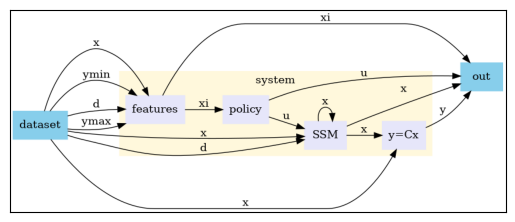

/home/alireza/neuromancer/neuromancer/neuromancer_RL/src/neuromancer/constraint.py:169: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(left, right)
/home/alireza/neuromancer/neuromancer/neuromancer_RL/src/neuromancer/constraint.py:169: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 99, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(left, right)


epoch: 0  train_loss: 63.41758346557617
epoch: 1  train_loss: 57.8773078918457
epoch: 2  train_loss: 51.748619079589844
epoch: 3  train_loss: 44.94519805908203
epoch: 4  train_loss: 37.888031005859375
epoch: 5  train_loss: 31.453039169311523
epoch: 6  train_loss: 26.534229278564453
epoch: 7  train_loss: 23.382808685302734
epoch: 8  train_loss: 21.45922088623047
epoch: 9  train_loss: 20.24320411682129
epoch: 10  train_loss: 19.384517669677734
epoch: 11  train_loss: 18.731746673583984
epoch: 12  train_loss: 18.21244239807129
epoch: 13  train_loss: 17.785303115844727
epoch: 14  train_loss: 17.421871185302734
epoch: 15  train_loss: 17.109683990478516
epoch: 16  train_loss: 16.845874786376953
epoch: 17  train_loss: 16.623390197753906
epoch: 18  train_loss: 16.436786651611328
epoch: 19  train_loss: 16.282339096069336
epoch: 20  train_loss: 16.150775909423828
epoch: 21  train_loss: 16.035625457763672
epoch: 22  train_loss: 15.933070182800293
epoch: 23  train_loss: 15.835790634155273
epoch: 24

In [30]:
dpc_system = dpc(epochs=200)
system = psl.systems['LinearSimpleSingleZone']()
umin = torch.tensor(system.umin)
umax = torch.tensor(system.umax)
nx = system.nx    # number of states
nu = system.nu    # number of control inputs
nd = 3          # number of disturbances
nd_obsv = system.nd    # number of observable disturbances
ny = system.ny           # number of controlled outputs
nref = system.ny           # number of references
y_idx = 3

### Evaluate the RL and DPC models

In [31]:
def evaluate_continuous_rl(env, agent, horizon):
    """Evaluate the agent in consecutive episodes and return evaluation history and plots."""

    # Initialize environment and evaluation histories
    eval_hist_rewards = []
    eval_hist_cost = []
    eval_hist_actions = []
    eval_hist_outputs = []
    eval_hist_ymin = []
    eval_hist_ymax = []
    obs_hist = []

    env.reset()
    np_refs = psl.signals.step(horizon + 2, 1, min=env.def_min_temp, max=env.def_max_temp, randsteps=5)
    env.y_min = np_refs[0]
    env.y_max = env.y_min + 2
    eval_hist_ymin.append(env.y_min)
    eval_hist_ymax.append(env.y_max)
    obs = env.build_state()
    eval_hist_outputs.append(env.y)

    for _ in range(horizon):
        action = agent.select_action(obs)
        next_obs, reward, cost, done = env.step(action)

        # Log step details
        eval_hist_rewards.append(reward)
        eval_hist_cost.append(cost)
        eval_hist_actions.append(action)
        eval_hist_outputs.append(env.y)
        eval_hist_ymin.append(env.y_min)
        eval_hist_ymax.append(env.y_max)
        denormalized_obs = torch.tensor(obs) * env.state_stds + env.state_means
        obs_hist.append(denormalized_obs)

        env.y_min = np_refs[_ + 1]
        env.y_max = env.y_min + 2

        obs = next_obs

    outputs = {"x0": env.trajectory["x0"], "D": env.trajectory["D"][0:horizon], "ref": np_refs, "y": eval_hist_outputs,
               "rewards": eval_hist_rewards, "costs": eval_hist_cost, "actions": eval_hist_actions,
               "obs_hist": obs_hist}
    return outputs


In [129]:
horizon = 2000
outputs = evaluate_continuous_rl(env, agent, horizon)

np_refs = outputs["ref"][:-1]
ymin_val = torch.tensor(np_refs, dtype=torch.float32).reshape(1, horizon+1, 1)
ymax_val = ymin_val+2.0
# generate disturbance signal
torch_dist = torch.cat((outputs["D"].reshape(1,horizon,3), torch.randn(1, 1, 3)), dim=1)
# initial data for closed loop simulation
x0 = outputs["x0"].reshape(1,1,4)
data = {'x': x0,
        'ymin': ymin_val,
        'ymax': ymax_val,
        'd': torch_dist}
dpc_system.nsteps = horizon
# perform closed-loop simulation
trajectories = dpc_system(data)


### Plot the RL and DPC model performance

In [132]:
import matplotlib.pyplot as plt
import numpy as np

def plot_evaluation_results(controlled_temp, temp_min_bounds, temp_max_bounds, rl_actions, disturbances, trajectories):
    """
    Plots the evaluation results comparing RL and DPC models.

    Args:
        controlled_temp: RL model's controlled zone temperatures (outputs["y"]).
        temp_min_bounds: Reference minimum temperature bounds (outputs["ref"]).
        temp_max_bounds: Reference maximum temperature bounds (outputs["ref"] + 2).
        rl_actions: Actions taken by the RL model (outputs["actions"]).
        disturbances: External disturbances like outdoor temp, heat load, solar radiation (outputs["D"]).
        trajectories: DPC model trajectories.
    """

    # Plot controlled zone temperatures
    plt.figure(figsize=(20, 5))
    plt.plot([temp[0][0] for temp in controlled_temp], label="Controlled Temp (RL)", color='blue', linestyle='-', linewidth=4, alpha=0.7)
    plt.plot([temp[0].cpu().detach() for temp in trajectories['y'][0]], label="Controlled Temp (DPC)", color='red', linestyle='-', linewidth=4, alpha=0.7)

    time_steps = np.arange(len(temp_min_bounds) - 1)
    plt.step(time_steps, np.ravel(temp_min_bounds[:-1]), where='post', label="Min Temp Bound", color='green', linestyle='--', linewidth=2)
    plt.step(time_steps, np.ravel(temp_max_bounds[:-1]), where='post', label="Max Temp Bound", color='orange', linestyle='--', linewidth=2)
    plt.fill_between(time_steps, np.ravel(temp_min_bounds[:-1]), np.ravel(temp_max_bounds[:-1]),
                     color='yellow', alpha=0.3, label='Valid Temp Range')

    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Temperature (°C)", fontsize=14)
    plt.title("Controlled Zone Temperature (RL vs. DPC)", fontsize=18)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='best')
    plt.tight_layout()

    # Plot RL and DPC actions
    plt.figure(figsize=(20, 5))
    plt.plot([(action[0][0]) * 5000.0 for action in rl_actions], label="Actions (RL)", color='blue', linestyle='-', linewidth=4, alpha=0.7)
    plt.plot([action.cpu().detach() for action in trajectories['u'][0]], label="Actions (DPC)", color='red', linestyle='-', linewidth=4, alpha=0.7)

    plt.ylim(0, 5000)
    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Actions (Scaled)", fontsize=14)
    plt.title("Actions Taken (RL vs. DPC)", fontsize=18)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='upper right')
    plt.tight_layout()

    # Plot disturbances
    plt.figure(figsize=(20, 5))
    plt.plot([dist[0] for dist in disturbances], label="Outdoor Air Temp", color='red', linestyle='-', linewidth=4)
    plt.plot([dist[1] for dist in disturbances], label="Occupant Heat Load", color='green', linestyle='-', linewidth=4)
    plt.plot([dist[2] for dist in disturbances], label="Solar Radiation", color='blue', linestyle='-', linewidth=4)

    plt.xlabel("Time Step", fontsize=14)
    plt.ylabel("Disturbances", fontsize=14)
    plt.title("External Disturbances Over Time", fontsize=18)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='upper right')
    plt.tight_layout()

    plt.show()
    
        # Ensure bounds are tensors for consistent comparison
    temp_min_bounds = torch.tensor(temp_min_bounds, dtype=torch.float32)
    temp_max_bounds = torch.tensor(temp_max_bounds, dtype=torch.float32)

    # Initialize costs
    rl_operational_cost = 0
    rl_violation_cost = 0
    dpc_operational_cost = 0
    dpc_violation_cost = 0

    # Calculate RL costs
    for i, (temp, action) in enumerate(zip(controlled_temp, rl_actions)):
        temp_value = temp[0].item()
        action_value = action[0][0].item() * 5000.0
        rl_operational_cost += action_value

        if temp_value < temp_min_bounds[i].item():
            rl_violation_cost += 50 * (temp_min_bounds[i].item() - temp_value)
        elif temp_value > temp_max_bounds[i].item():
            rl_violation_cost += 50 * (temp_value - temp_max_bounds[i].item())
    

    # Calculate DPC costs
    for i, (temp, action) in enumerate(zip(trajectories['y'][0], trajectories['u'][0])):
        temp_value = temp.cpu().detach().item()
        action_value = action.cpu().detach().item()
        dpc_operational_cost += action_value

        if temp_value < temp_min_bounds[i].item():
            dpc_violation_cost += 50 * (temp_min_bounds[i].item() - temp_value)
        elif temp_value > temp_max_bounds[i].item():
            dpc_violation_cost += 50 * (temp_value - temp_max_bounds[i].item())

    # Display results
    print("=== Cost Analysis ===")
    print(f"RL Operational Cost: {rl_operational_cost:.2f}")
    print(f"RL Constraint Violation Cost: {rl_violation_cost:.2f}")
    print(f"DPC Operational Cost: {dpc_operational_cost:.2f}")
    print(f"DPC Constraint Violation Cost: {dpc_violation_cost:.2f}")

    # Bar plot for costs with dual axes
    labels = ['Operational Cost', 'Violation Cost']
    rl_costs = [rl_operational_cost, rl_violation_cost]
    dpc_costs = [dpc_operational_cost, dpc_violation_cost]
    
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax1 = plt.subplots(figsize=(15, 6))
    
    # Plot operational costs on the left y-axis
    bars_rl = ax1.bar(x - width/2, rl_costs, width, label='RL', color='blue', alpha=0.7)
    bars_dpc = ax1.bar(x + width/2, dpc_costs, width, label='DPC', color='red', alpha=0.7)
    ax1.set_ylabel('Operational Cost', fontsize=14)
    ax1.set_ylim(0, max(rl_operational_cost, dpc_operational_cost) * 1.2)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=12)
    ax1.set_title('Cost Comparison: RL vs. DPC', fontsize=16)
    
    # Add a secondary y-axis for violation costs
    ax2 = ax1.twinx()
    ax2.set_ylabel('Violation Cost', fontsize=14)
    ax2.set_ylim(0, max(rl_violation_cost, dpc_violation_cost) * 1.2)
    
    # Add the violation costs as bars but differentiate them visually
    bars_rl_violation = ax2.bar(x - width/2, [0, rl_violation_cost], width, label='RL Violation', color='darkblue', alpha=0.5, hatch='//')
    bars_dpc_violation = ax2.bar(x + width/2, [0, dpc_violation_cost], width, label='DPC Violation', color='darkred', alpha=0.5, hatch='//')
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
    
    plt.tight_layout()
    plt.show()


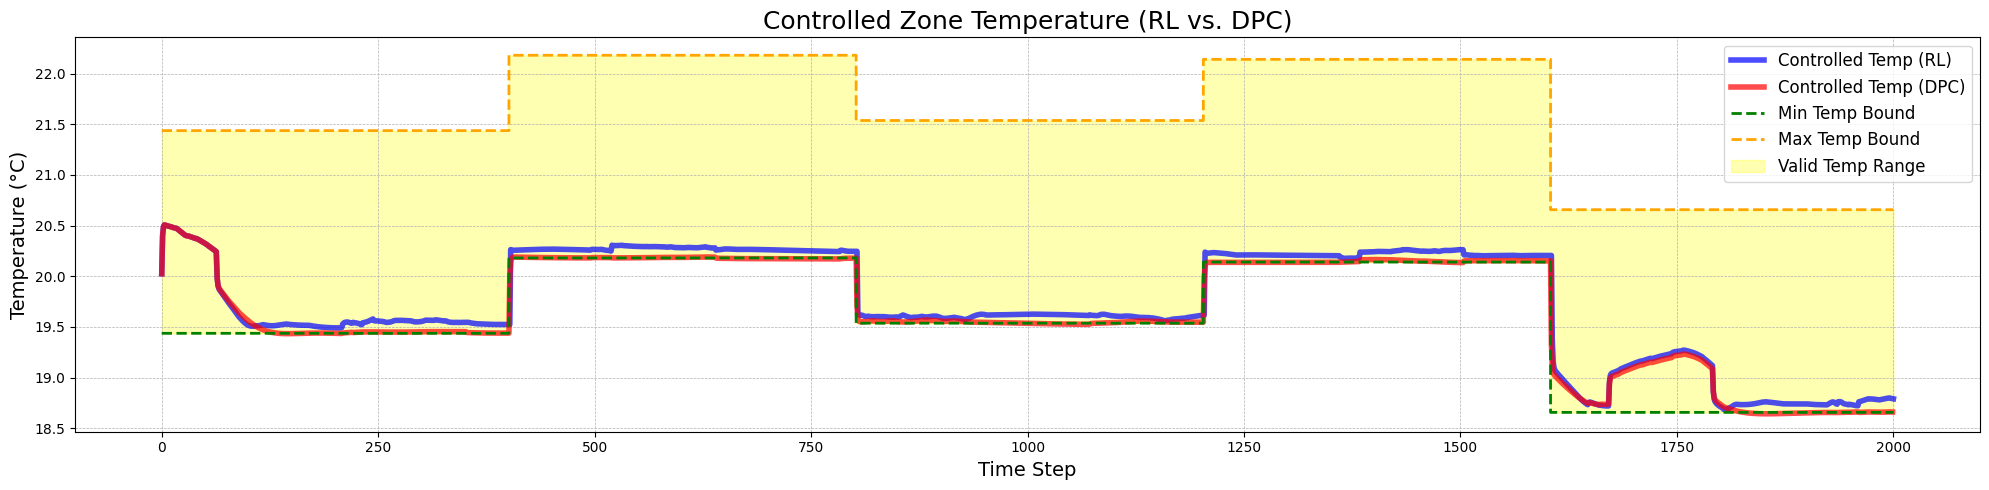

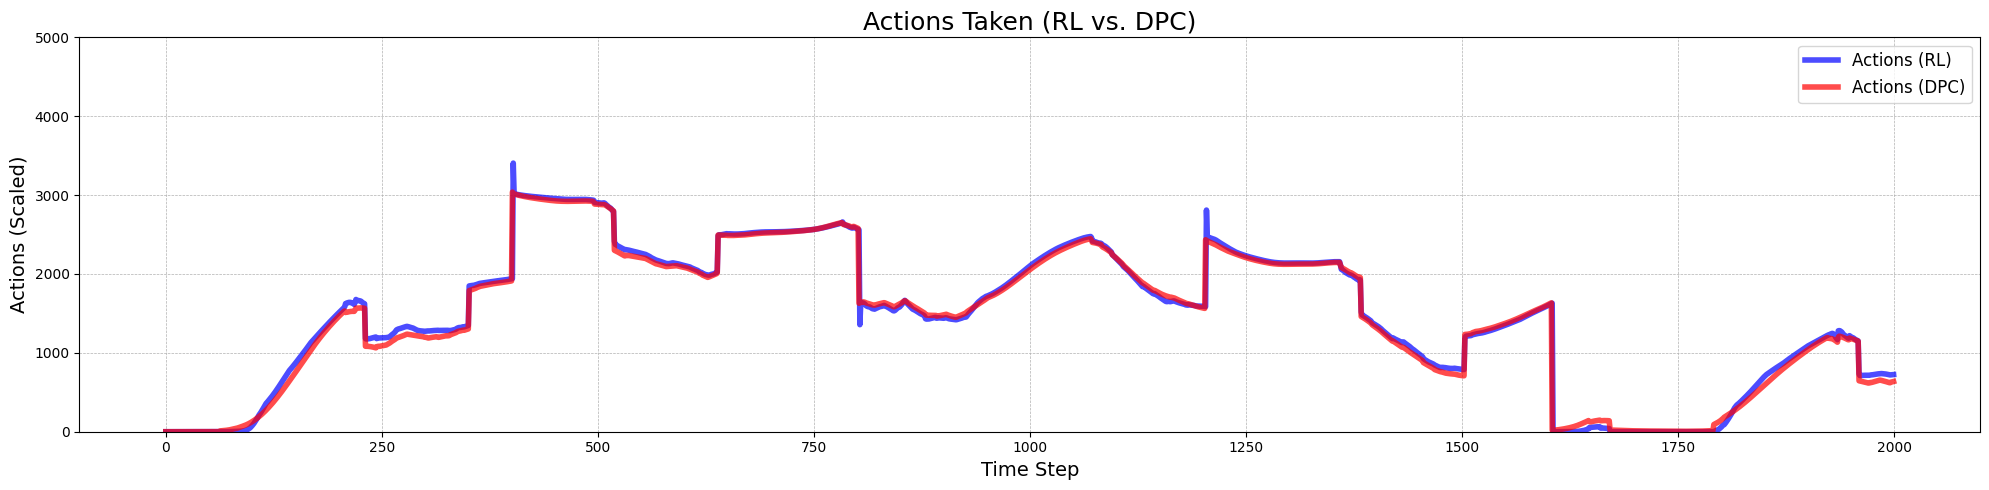

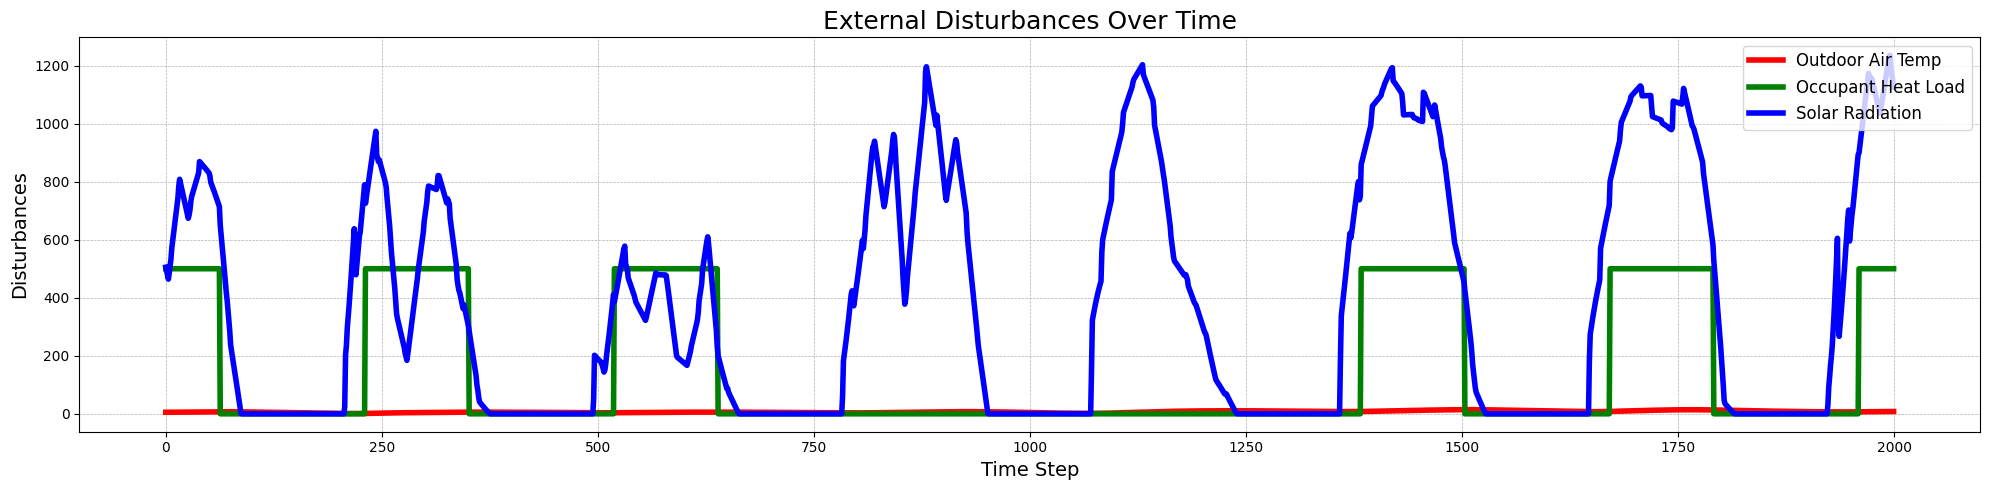

=== Cost Analysis ===
RL Operational Cost: 2969525.16
RL Constraint Violation Cost: 117.89
DPC Operational Cost: 2930208.41
DPC Constraint Violation Cost: 239.64


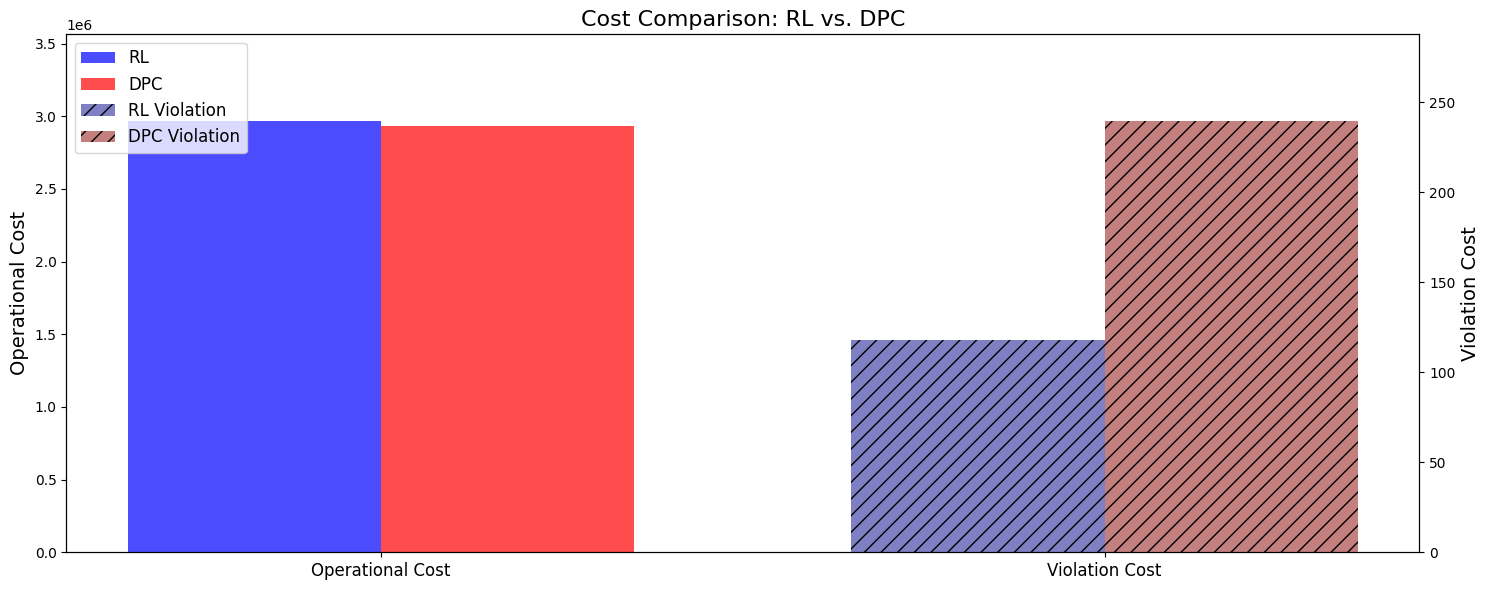

In [133]:
plot_evaluation_results(outputs["y"], outputs["ref"], outputs["ref"]+2, outputs["actions"], outputs["D"], trajectories)